# Assignment 4

Jakub Jakubiszak

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10



In this assignment we are going to utilze CNN to classify images from CIFAR-10 dataset. The dataset has 10 labeled classes:

-airplane
-automobile
-bird
-cat
-deer
-dog
-frog
-horse
-ship
-truck

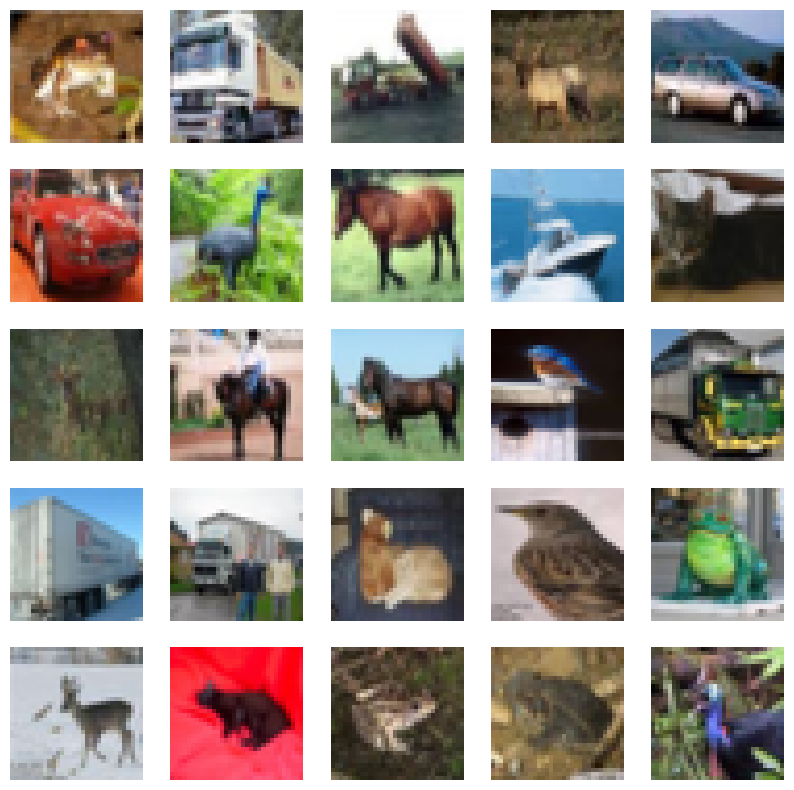

Class 0: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 3: 5000 samples
Class 4: 5000 samples
Class 5: 5000 samples
Class 6: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 9: 5000 samples


In [ ]:
# Load CIFAR-10 dataset


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

# Print class distribution
classes, counts = np.unique(y_train, return_counts=True)
for c, count in zip(classes, counts):
    print(f"Class {c}: {count} samples")

The pictures above are the examples of the ones in the dataset. We can see that each class has 5000 images.

The split between training and testing data in our case is 80%-20%.

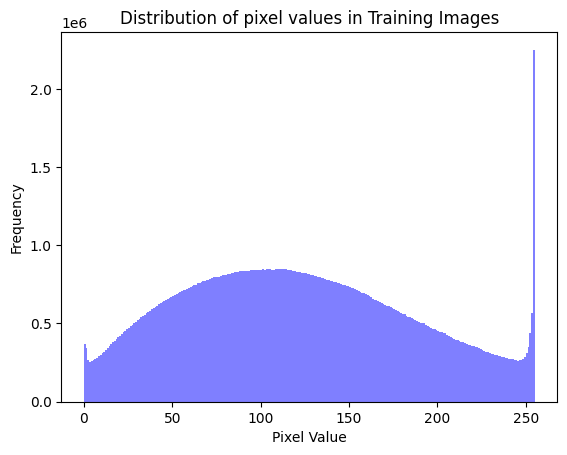

In [ ]:
plt.hist(x_train.flatten(), bins=255, color='blue', alpha=0.5)
plt.title("Distribution of pixel values in Training Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

From the distribution of the pixel values, we can see that our data will require some preprocessing and normalization.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier, KerasRegressor
import keras.optimizers

In [ ]:
# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


In [ ]:
def create_model(learning_rate, filters, kernel_size, pool_size, dropout_rate, activation):
    model = Sequential()

    model.add(Conv2D(filters, kernel_size, activation=activation, input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size))
    model.add(Conv2D(filters*2, kernel_size, activation=activation))
    model.add(MaxPooling2D(pool_size))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))


    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model1=create_model(learning_rate=0.001, filters=32, kernel_size=(3,3), pool_size=(2,2), dropout_rate=0.2, activation='relu')
model2=create_model(0.001, 32, kernel_size=(4,4), pool_size=(3,3), dropout_rate=0.3,activation='relu')
model3=create_model(0.001, 32, kernel_size=(5,5), pool_size=(2,2), dropout_rate=0.1,activation='relu')

In [ ]:
fit_history1=model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
fit_history2=model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
fit_history3=model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.5253 - accuracy: 0.4578 - val_loss: 1.2560 - val_accuracy: 0.5604
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1956 - accuracy: 0.5846 - val_loss: 1.1225 - val_accuracy: 0.6102
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0797 - accuracy: 0.6274 - val_loss: 1.0154 - val_accuracy: 0.6517
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0089 - accuracy: 0.6530 - val_loss: 0.9620 - val_accuracy: 0.6638
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9567 - accuracy: 0.6717 - val_loss: 0.9329 - val_accuracy: 0.6807
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9169 - accuracy: 0.6839 - val_loss: 0.9297 - val_accuracy: 0.6780
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8855 - accuracy: 0.6946 - val_loss: 0.9193 -

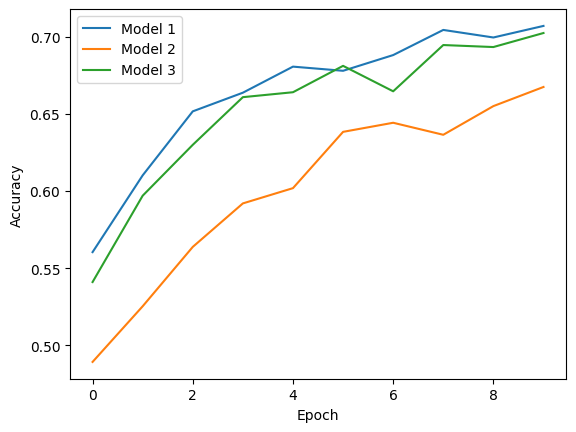

In [ ]:
plt.plot(fit_history1.history['val_accuracy'], label = 'Model 1')
plt.plot(fit_history2.history['val_accuracy'], label = 'Model 2')
plt.plot(fit_history3.history['val_accuracy'], label = 'Model 3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

print('MODEL 1')

test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f'Accuracy: {test_acc}')

# Confusion Matrix and Classification Report
y_pred = np.argmax(model1.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)

print('MODEL 2')

test_loss, test_acc = model2.evaluate(x_test, y_test)
print(f'Accuracy: {test_acc}')

# Confusion Matrix and Classification Report
y_pred = np.argmax(model2.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)

print('MODEL 3')

test_loss, test_acc = model3.evaluate(x_test, y_test)
print(f'Accuracy: {test_acc}')

# Confusion Matrix and Classification Report
y_pred = np.argmax(model3.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)

MODEL 1
313/313 [==============================] - 4s 14ms/step - loss: 0.8697 - accuracy: 0.7071
Accuracy: 0.707099974155426
313/313 [==============================] - 3s 9ms/step
Confusion Matrix:
 [[766  21  44  27  15  11   3  11  64  38]
 [ 31 837   7   9   4  10   4   3  18  77]
 [ 78   9 551  79  94 101  26  46   8   8]
 [ 30  12  46 537  59 230  28  33  13  12]
 [ 21   4  60  69 643  55  30  97  14   7]
 [ 17   4  35 129  28 715   8  53   4   7]
 [  7   4  51 110  60  48 691  11   5  13]
 [ 13   4  22  38  50  84   2 775   2  10]
 [ 85  47  13  22   7  10   2   5 786  23]
 [ 47  91  10  22   6  14   5  13  22 770]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.81      0.84      0.82      1000
           2       0.66      0.55      0.60      1000
           3       0.52      0.54      0.53      1000
           4       0.67      0.64      0.65      1000
           5       0

In [ ]:
# Wrap the model using KerasClassifier for compatibility with GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


# Define hyperparameter grid for GridSearchCV
param_grid = {
    'model__learning_rate': [0.001, 0.01],
    'model__kernel_size': [(3, 3), (4, 4)],
    'model__pool_size': [(2, 2)],
    'model__activation': ['relu'],
    'model__filters': [32],
    'model__dropout_rate': [0.1,0.2]
}

# Create GridSearchCV instance
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:

# print best parameter after tuning
print(grid_result.best_params_)
y_pred = np.argmax(grid_result.predict(x_test) , axis=1)
y_true = np.argmax(y_test, axis=1)

#conf_matrix = confusion_matrix(y_true, grid_predictions)
print("Confusion Matrix:\n", confusion_matrix(y_true,y_pred))

# print classification report
print(classification_report(y_test, grid_result.predict(x_test)))



{'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__filters': 32, 'model__kernel_size': (3, 3), 'model__learning_rate': 0.001, 'model__pool_size': (2, 2)}
Confusion Matrix:
 [[731  21  59   7  13   7  10   4 116  32]
 [ 37 795   8   5   1   4   8   2  34 106]
 [ 60   6 619  35  56  68  76  43  22  15]
 [ 31  19  99 426  51 178  85  50  38  23]
 [ 32   5 128  52 515  42  76 121  22   7]
 [ 20   4  90 128  25 598  32  62  26  15]
 [ 12   7  58  35  22  29 804  11  11  11]
 [ 27   1  51  26  34  64   9 760   4  24]
 [ 53  19  12   6   4   4   3   4 872  23]
 [ 43  75  15  10   2   4   7   5  59 780]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1000
           1       0.84      0.80      0.81      1000
           2       0.54      0.62      0.58      1000
           3       0.58      0.43      0.49      1000
           4       0.71      0.52      0.60      1000
           5       0.60      0.60      0.60      1000
  

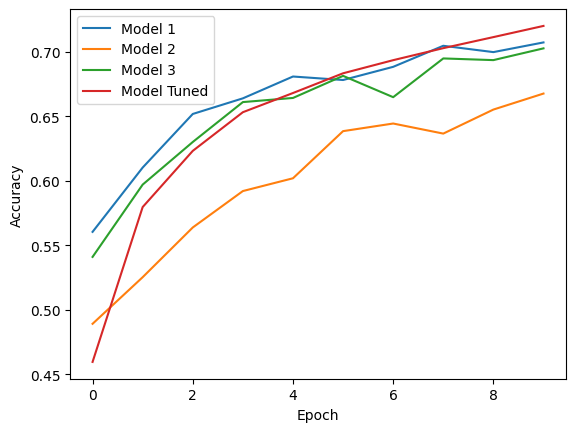

In [ ]:
plt.plot(fit_history1.history['val_accuracy'], label = 'Model 1')
plt.plot(fit_history2.history['val_accuracy'], label = 'Model 2')
plt.plot(fit_history3.history['val_accuracy'], label = 'Model 3')
plt.plot(grid_result.best_estimator_.history_['accuracy'], label = 'Model Tuned')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see, that our tuned model outperforms the previous ones.


Now we will implement the LeNet model to compare it, to our implementations of CNN.

In [ ]:
from keras.layers import Activation

In [ ]:
def create_LeNet():
    model = Sequential()

    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3),padding="same"))

    model.add(AveragePooling2D(pool_size=(2, 2),padding="valid"))


    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',padding="valid"))

    model.add(AveragePooling2D(pool_size=(2, 2),padding="valid"))



    model.add(Dense(120, activation='relu'))

    model.add(Dense(84, activation='relu'))

    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

    return model

In [ ]:
model_Le=create_LeNet()

LeNet_fit=model_Le.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 67s 41ms/step - loss: 1.5824 - accuracy: 0.4279 - val_loss: 1.3941 - val_accuracy: 0.5050
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.3215 - accuracy: 0.5288 - val_loss: 1.2745 - val_accuracy: 0.5472
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2092 - accuracy: 0.5711 - val_loss: 1.1825 - val_accuracy: 0.5783
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1292 - accuracy: 0.6000 - val_loss: 1.1783 - val_accuracy: 0.5778
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0645 - accuracy: 0.6259 - val_loss: 1.0914 - val_accuracy: 0.6176
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0082 - accuracy: 0.6449 - val_loss: 1.1125 - val_accuracy: 0.6087
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9688 - accuracy: 0.6608 - val_loss: 1.0622 -

In [ ]:
# Confusion Matrix and Classification Report
y_pred = np.argmax(model_Le.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)

313/313 [==============================] - 6s 19ms/step
Confusion Matrix:
 [[698  24  74  39  17  12  14  25  56  41]
 [ 35 780  10  14   3   3  13   3  32 107]
 [ 59  12 500 113 113  64  67  46  15  11]
 [ 18   9  76 539  57 151  70  43  16  21]
 [ 37   5  73  93 537  49  68 119  12   7]
 [ 10   5  72 260  57 475  34  70   9   8]
 [  5   8  49  91  40  38 736  16   7  10]
 [ 17   6  40  63  60  58  10 718   5  23]
 [131  45  29  23   5   5   6   8 727  21]
 [ 44 121  15  33   4  14  10  30  28 701]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68      1000
           1       0.77      0.78      0.77      1000
           2       0.53      0.50      0.52      1000
           3       0.43      0.54      0.48      1000
           4       0.60      0.54      0.57      1000
           5       0.55      0.47      0.51      1000
           6       0.72      0.74      0.73      1000
           7       0.67      0.72    

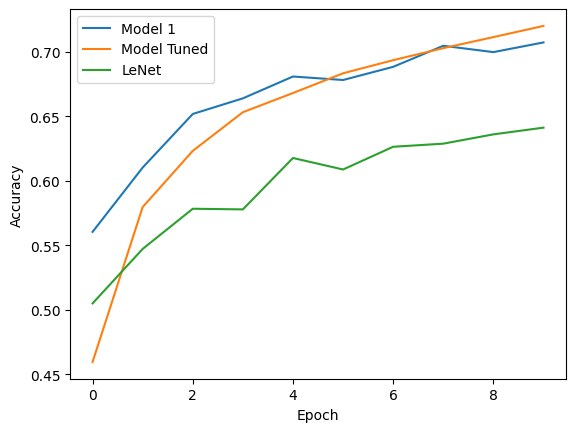

In [ ]:
plt.plot(fit_history1.history['val_accuracy'], label = 'Model 1')
plt.plot(grid_result.best_estimator_.history_['accuracy'], label = 'Model Tuned')
plt.plot(LeNet_fit.history['val_accuracy'], label = 'LeNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see that the tuned model had the best accuracy after 10 epochs and was followed by the model proposed in the first part of the list. The LeNet model has performed the worst.